# AIM:
* In this Project,On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile


* In this data:
    * id:ID
    * battery_power:Total energy a battery can store in one time measured in mAh
    * blue:Has bluetooth or not
    * clock_speed:speed at which microprocessor executes instructions
    * dual_sim:Has dual sim support or not
    * fc:Front Camera mega pixels
    * four_g:Has 4G or not
    * int_memory:Internal Memory in Gigabytes
    * m_dep:Mobile Depth in cm
    * mobile_wt:Weight of mobile phone
    * n_cores:Number of cores of processor
    * pc:Primary Camera mega pixels
    * px_height:Pixel Resolution Height
    * px_width:Pixel Resolution Width
    * ram:Random Access Memory in Megabytes
    * sc_h:Screen Height of mobile in cm
    * sc_w:Screen Width of mobile in cm
    * talk_time:longest time that a single battery charge will last when you are
    * three_g:Has 3G or not
    * touch_screen:Has touch screen or not
    * wifi:Has wifi or not



#### USE:

* This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer
* Also it will be usefull for Consumers to verify that they are paying best price for a mobile.

##### Applied Models:


* Linear Regression
* KNN
* Logistic Regression
* Decision tree
* Random forest
* SVM 


## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv('train.csv')

In [3]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Data Analysis

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Data Visualization & Analysis

In [6]:
#sns.pairplot(dataset,hue='price_range')

### How does ram is affected by price

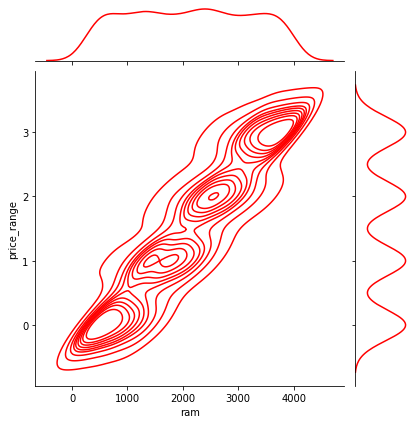

In [7]:
sns.jointplot(x='ram',y='price_range',data=dataset,color='red',kind='kde');

### Internal Memory vs Price Range

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

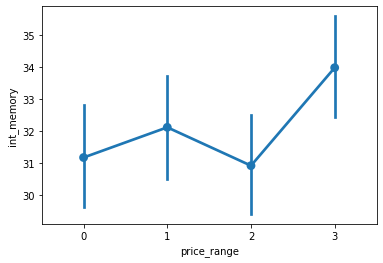

In [8]:
sns.pointplot(y="int_memory", x="price_range", data=dataset)

### % of Phones which support 3G

In [9]:
labels = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts().values

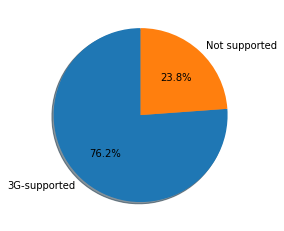

In [10]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()


### % of Phones which support 4G


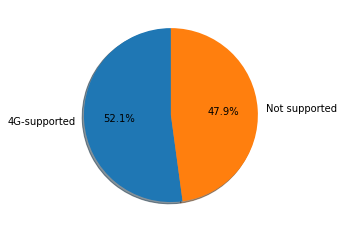

In [11]:
labels4g = ["4G-supported",'Not supported']
values4g = dataset['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

### Battery power vs Price Range

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

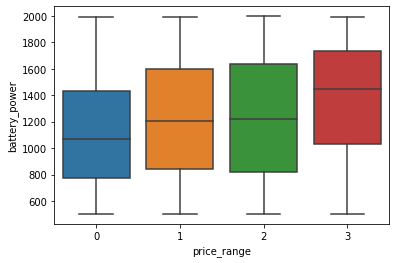

In [12]:
sns.boxplot(x="price_range", y="battery_power", data=dataset)

### No of Phones vs Camera megapixels of front and primary camera

Text(0.5, 0, 'MegaPixels')

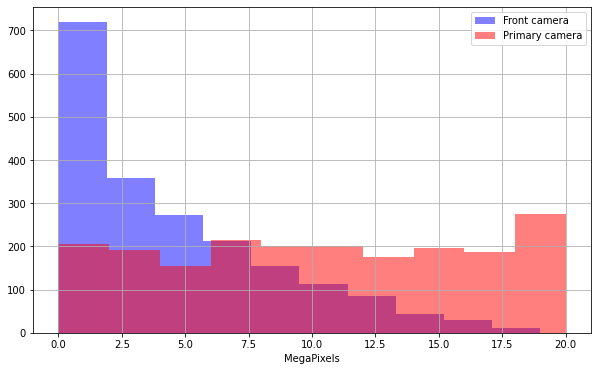

In [13]:
plt.figure(figsize=(10,6))
dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

### Mobile Weght vs Price range

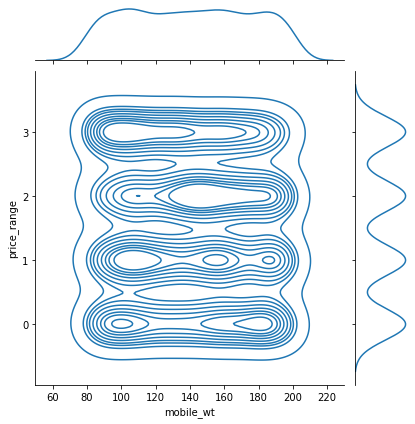

In [14]:
sns.jointplot(x='mobile_wt',y='price_range',data=dataset,kind='kde');

### Talk time vs Price range

<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

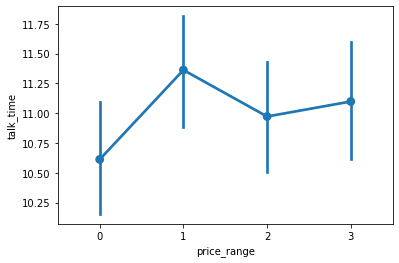

In [15]:
sns.pointplot(y="talk_time", x="price_range", data=dataset)

## X & Y array

In [16]:
X=dataset.drop('price_range',axis=1)

In [17]:
y=dataset['price_range']

## Splitting the data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Creating & Training Linear Regression Model

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression()

In [22]:
lm.score(X_test,y_test)

0.9132801488185276

## Creating & Training KNN Model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [24]:
knn.score(X_test,y_test)

0.9212121212121213

### Elbow Method For optimum value of K

In [25]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

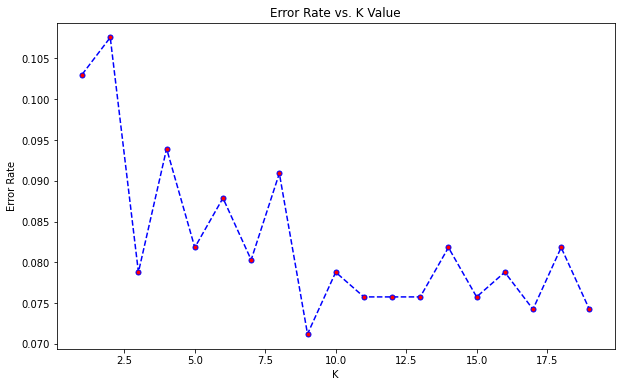

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Creating & Training Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()


In [28]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [29]:
logmodel.score(X_test,y_test)

0.6181818181818182

## Creating & Training Decision Tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [31]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
dtree.score(X_test,y_test)

0.8227272727272728

In [33]:
pip install pydotplus


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install pydot


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Tree Visualization

In [35]:
feature_names=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']

In [36]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn import tree

In [37]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'


In [38]:
from graphviz import Digraph
import pydotplus

In [39]:

#import pydotplus as pydot

#from IPython.display import Image

#from sklearn.externals.six import StringIO

#from six import StringIO

#from sklearn.tree import export_graphviz

#dot_data = StringIO()

#tree.export_graphviz(dtree, out_file=dot_data,feature_names=feature_names)

#graph = pydot.graph_from_dot_data(dot_data.getvalue())

#Image(graph.create_png())


#For tree Visualization as kaggle does't support pydotplus just install the pydotplus in your systems's conda terminal

In [40]:

#from IPython.display import Image  
#from sklearn.externals.six import StringIO  
#from sklearn.tree import export_graphviz
#import pydot 
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#dot_data = StringIO() 

#export_graphviz(dtree, out_file=dot_data,feature_names=feature_names,filled=True)

#graph = pydot.graph_from_dot_data(dot_data.getvalue())  
#Image(graph[0].create_png())

#Another way

## Creating & Training Random Tree Model

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [42]:
rfc.score(X_test,y_test)

0.8757575757575757

# Creating & Training SVM Model

In [43]:
from sklearn.svm import SVC
from sklearn import metrics

In [44]:
clf_2=SVC(C=0.75,decision_function_shape='ovo',gamma='auto',kernel='linear',random_state=2)
clf_2=clf_2.fit(X_train,y_train)
y_pred=clf_2.predict(X_test)
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.9651515151515152


# Conclusion: SVM, KNN & Linear Regression performed the best

## RESULT : Linear Regression

In [45]:
y_pred=lm.predict(X_test)


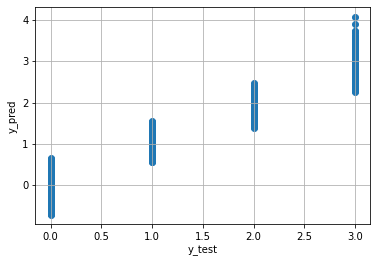

In [46]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.grid()

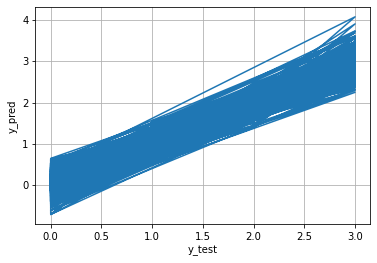

In [47]:
plt.plot(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.grid()

In [48]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  0.27023843059925123
Mean Squared Error:  0.10284763323854826
Root Mean Squared Error:  0.3206986642294418
R2 Score:  0.9132801488185276


## RESULT: KNN

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
pred = knn.predict(X_test)

In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       158
           1       0.88      0.95      0.91       152
           2       0.93      0.85      0.89       199
           3       0.92      0.93      0.93       151

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



In [52]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[156   2   0   0]
 [  6 144   2   0]
 [  0  17 170  12]
 [  0   0  10 141]]


<AxesSubplot:>

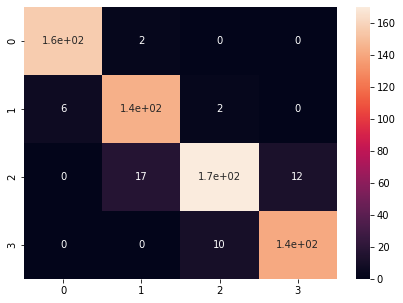

In [53]:
plt.figure(figsize = (7,5))
sns.heatmap(matrix,annot=True)


# RESULT : SVM


In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
pred = clf_2.predict(X_test)

In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       158
           1       0.94      0.97      0.95       152
           2       0.95      0.94      0.95       199
           3       0.98      0.96      0.97       151

    accuracy                           0.97       660
   macro avg       0.97      0.97      0.97       660
weighted avg       0.97      0.97      0.97       660



In [57]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[156   2   0   0]
 [  1 148   3   0]
 [  0   8 188   3]
 [  0   0   6 145]]


<AxesSubplot:>

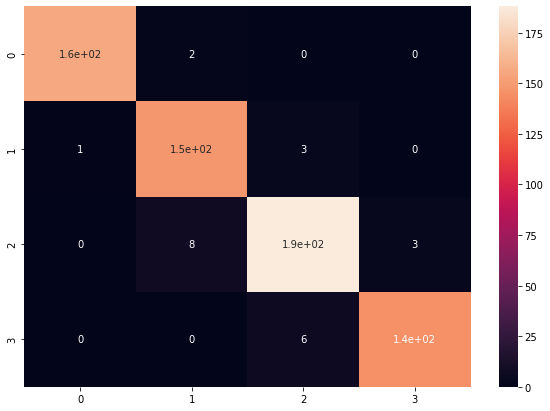

In [58]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

# Price prediction of Test.csv Using SVM for Prediction

### Import test.csv

In [59]:
data_test=pd.read_csv('test.csv')

In [60]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [61]:
data_test=data_test.drop('id',axis=1)

In [62]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [63]:
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


# Model

In [64]:
#predicted_price=knn.predict(data_test)

In [65]:
from sklearn.svm import SVC
from sklearn import metrics

In [66]:
clf_2=SVC(C=0.75,decision_function_shape='ovo',gamma='auto',kernel='linear',random_state=2)
clf_2=clf_2.fit(X_train,y_train)
y_pred=clf_2.predict(X_test)
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.9651515151515152


# Predicted Price Range

In [67]:
predicted_price=clf_2.predict(data_test)

In [68]:
predicted_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 1, 3, 0, 1, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

# Adding Predicted price to test.csv

In [69]:
data_test['price_range']=predicted_price

In [70]:
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


In [71]:
data_test[data_test.columns[20]].count()  

1000

# DTs and RF an other way

In [72]:
df = dataset[dataset["sc_w"] >= 2]
df.reset_index(inplace = True)
df.drop("index", axis = 1, inplace = True)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1606,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1607,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1608,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [73]:
df_finall = df[df["px_height"] != 0]
df_finall 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1606,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1607,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1608,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [74]:
df2 = data_test[data_test["sc_w"] >= 2]
df2.reset_index(inplace = True)
df2.drop("index", axis = 1, inplace = True)
df2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
2,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
3,1464,1,2.9,1,5,1,50,0.8,198,8,...,569,939,3506,10,7,3,1,1,1,3
4,1718,0,2.4,0,1,0,47,1.0,156,2,...,1283,1374,3873,14,2,10,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,567,1,2.7,1,14,1,56,0.4,165,8,...,555,1290,336,7,6,7,1,1,1,0
785,936,1,1.4,1,0,0,46,0.8,139,2,...,265,886,684,8,5,12,1,1,1,0
786,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
787,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


In [75]:
df2_finall = df2[df2["px_height"] != 0]
df2_finall 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
2,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
3,1464,1,2.9,1,5,1,50,0.8,198,8,...,569,939,3506,10,7,3,1,1,1,3
4,1718,0,2.4,0,1,0,47,1.0,156,2,...,1283,1374,3873,14,2,10,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,567,1,2.7,1,14,1,56,0.4,165,8,...,555,1290,336,7,6,7,1,1,1,0
785,936,1,1.4,1,0,0,46,0.8,139,2,...,265,886,684,8,5,12,1,1,1,0
786,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
787,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


# DTs

In [76]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [77]:
Xd = df_finall.drop("price_range", axis = 1,)
yd = df_finall.price_range.values.reshape(-1,1)

In [78]:
def DTs(Xd, yd, Testsize, mdepth):
    df_evaluation = pd.DataFrame()
    for x in Testsize:
        X_train, X_test, y_train, y_test = train_test_split(Xd,yd, test_size = x, random_state = 0)
        for maxdepth in mdepth:
            clf = DecisionTreeClassifier(max_depth = maxdepth)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            dict = {"Test_size": x, "Max_depth": maxdepth, "acc": metrics.accuracy_score(y_test, y_pred), "score": clf.score(Xd,yd)}
            df_evaluation = df_evaluation.append(dict, ignore_index = True)
    return(df_evaluation)
# This function highlight s maximum values
def highlight_max(s):
    is_max = s == s.max()
    return["background_color: yellow" if v else "" for v in is_max]

In [79]:
df_evaluation = DTs(Xd, yd, [.1, .15, .2, .25, .3], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
df_evaluation.style.apply(highlight_max)

,Test_size,Max_depth,acc,score
0,0.100000,1.000000,0.521739,0.497203
1,0.100000,2.000000,0.776398,0.766314
2,0.100000,3.000000,0.788820,0.775637
3,0.100000,4.000000,0.838509,0.839030
4,0.100000,5.000000,0.807453,0.881293
5,0.100000,6.000000,0.826087,0.916097
6,0.100000,7.000000,0.807453,0.940336
7,0.100000,8.000000,0.832298,0.962710
8,0.100000,9.000000,0.838509,0.970789
9,0.100000,10.000000,0.857143,0.981355


In [80]:
X_train, X_test, y_train, y_test = train_test_split(Xd,yd, test_size = .1, random_state = 0)

In [81]:
clf = DecisionTreeClassifier(max_depth = 19, criterion ="entropy")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# RF

In [82]:
Xr = df_finall.drop("price_range", axis = 1,)
yr = df_finall.price_range.values.reshape(-1,1)

In [83]:
def RF(Xr, yr, Testsize, mdepth):
    df_evaluation = pd.DataFrame()
    for x in Testsize:
        X_train, X_test, y_train, y_test = train_test_split(Xr,yr, test_size = x, random_state = 0)
        for maxdepth in mdepth:
            RF = RandomForestClassifier(max_depth = maxdepth, criterion = "entropy")
            RF.fit(X_train, y_train)
            y_pred = RF.predict(X_test)
            dict = {"Test_size": x, "Max_depth": maxdepth, "acc": metrics.accuracy_score(y_test, y_pred), "score": RF.score(Xr,yr)}
            df_evaluation = df_evaluation.append(dict, ignore_index = True)
    return(df_evaluation)


In [84]:
df_evaluation = RF(Xr, yr, [.1, .15, .2, .25, .3], [9,10,11,12,13,14,15,16,17,18,19,20])
df_evaluation.style.apply(highlight_max)

,Test_size,Max_depth,acc,score
0,0.100000,9.000000,0.900621,0.988813
1,0.100000,10.000000,0.869565,0.986948
2,0.100000,11.000000,0.875776,0.987570
3,0.100000,12.000000,0.906832,0.990677
4,0.100000,13.000000,0.906832,0.990677
5,0.100000,14.000000,0.875776,0.987570
6,0.100000,15.000000,0.894410,0.989434
7,0.100000,16.000000,0.881988,0.988191
8,0.100000,17.000000,0.888199,0.988813
9,0.100000,18.000000,0.869565,0.986948


In [85]:
df_evaluation.max()

Test_size     0.300000
Max_depth    20.000000
acc           0.913223
score         0.991299
dtype: float64

In [86]:
 X_train, X_test, y_train, y_test = train_test_split(Xd,yd, test_size = x, random_state = 0)

NameError: name 'x' is not defined

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Parisan\AppData\Local\Programs\Python\Python38\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Parisan\AppData\Local\Programs\Python\Python38\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Parisan\AppData\Local\Programs\Python\Python38\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Parisan\AppData\Local\Programs\Python\Python38\lib\asyncio\selector_events.py", line 115, in _read_fro